# Bumblekite Tutorial 1: Hidden Hypoxemia's Impact on In-Hospital Mortality


* Problem Statement: ​Pulse oximeters are medical devices used to assess peripheral arterial oxygen saturation (SpO2) noninvasively. In contrast, the "gold standard" requires arterial blood to be drawn to measure the arterial oxygen saturation (SaO2). Pulse oximeters currently on the market measure  in populations with darker skin tones with lower accuracy. Pulse oximetry inaccuracies can fail to detect episodes of hidden hypoxemia, i.e., low SaO2 with high SpO2. Hidden hypoxemias can result in less treatment and increased mortality. Yet flawed, pulse oximeters remain ubiquitously used because of their ease of use; debiasing the underlying algorithms could alleviate the downstream repercussions of hidden hypoxemia.

* Dataset: BOLD is a new comprehensive dataset that aims to underscore the importance of addressing biases in pulse oximetry accuracy, which disproportionately affect darker-skinned patients. The dataset was created by harmonizing three Electronic Health Record databases (MIMIC-III, MIMIC-IV, eICU-CRD) comprising Intensive Care Unit stays of US patients.

* Main Paper: The tutorial is build upon the paper titled "Analysis of Discrepancies Between Pulse Oximetry and Arterial Oxygen Saturation Measurements by Race and Ethnicity and Association With Organ Dysfunction and Mortality" published in JAMA Network Open. This paper investigates discrepancies between pulse oximetry (SpO2) and arterial oxygen saturation (SaO2) measurements, examining the impact of these discrepancies on clinical outcomes across different racial and ethnic groups.


* Objective of the tutorial: The objective of this tutorial is to provide a comprehensive guide on how to analyze and address biases in healthcare data, with a specific focus on hidden hypoxemia and its impact on in-hospital mortality predictions. Through a series of structured steps, including exploratory data analysis, data preprocessing, train-test splitting, and model evaluation, participants will learn how to:

1. Detect and understand hidden patterns and biases in healthcare datasets.
2. Preprocess data effectively to ensure robust and reliable model performance.
3. Evaluate the influence of hidden hypoxemia on patient outcomes using statistical and machine learning techniques.
4. Assess and compare the performance of different models across various racial groups to highlight the importance of careful feature selection and bias mitigation in clinical predictions.


* Key Variables to keep in mind: 

1. **Pulse Oximetry (SpO2)**: This is a [ non-invasive ] method used to measure the oxygen level (oxygen saturation) in the blood. It is usually done using a device clipped onto a finger, toe, or earlobe. Normal SpO2 levels range from 95% to 100%, indicating sufficient oxygen in the blood. Levels below 95% can indicate hypoxemia, with severe hypoxemia occurring below 85%.
2. **Arterial Oxygen Saturation (SaO2)**: [ invasive ] This is the measurement of oxygen saturation directly from the blood using an arterial blood gas (ABG) test. It is more accurate than pulse oximetry but requires drawing blood from an artery. SaO2 provides a direct measurement of oxygen levels in the blood and is used to confirm the accuracy of SpO2 readings, especially in cases of suspected hypoxemia.
3. **ABG**: Arterial Blood Gas 
4. **Hypoxemia**: This refers to low levels of oxygen in the blood. It can be dangerous and requires medical attention.
5. **Hidden Hypoxemia**: This occurs when a patient's pulse oximetry reading (SpO2) suggests they have normal oxygen levels, but their arterial oxygen saturation (SaO2) shows they actually have low oxygen levels. → (ie, SpO2 ≥ 88% but SaO2 <88%)
6. **Race and Ethnicity**: In this context, the paper examines differences in the accuracy of pulse oximetry readings among different racial and ethnic groups.
7. **Organ Dysfunction**: This refers to the impaired function of organs (like the heart, lungs, liver, or kidneys) often assessed using specific scores like the Sequential Organ Failure Assessment (SOFA) score.
8. **In-hospital Mortality**: This means death occurring during a hospital stay.
9. **Sequential Organ Failure Assessment (SOFA) Score**: A scoring system used to track a patient's status during their stay in an intensive care unit (ICU). Higher scores indicate more severe organ dysfunction.
10. **Electronic Health Record (EHR)**: Digital version of patients' paper charts. They contain the medical and treatment history of patients.



# Loading the dependencies and libraries 

In [403]:
#### Make sure you are in the right env kernel

In [404]:
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from tableone import TableOne
# consider adding 
# import warnings
# warnings.filterwarnings("ignore")

# Loading the Data 

In [405]:
# Path to your CSV file 
csv_path = '/Users/mac/Desktop/team_02/src/post_datathon/data/pulseox_dataset.csv'

# Read the CVS file using Pandas (df: dataframe)
df_initial = pd.read_csv (csv_path, low_memory = False) # second arg ensures that pandas reads the CSV file in one go and tries to infer the data types of the columns more accurately

# Pre Processing 

In [406]:
# View the first few rows 
df_initial.head()

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,subject_id,hospital_admission_id,icustay_id,source_db,hospitalid,numbedscategory,teachingstatus,...,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
0,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,...,1525.0,1.0,1525.0,0.0,1525.0,1.0,1525.0,0.0,1525.0,0.0
1,1,1,1,002-1007,178462,204935,eicu,71,100 - 249,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,002-10187,150828,169525,eicu,73,>= 500,True,...,1547.0,0.0,1547.0,0.0,1547.0,1.0,1547.0,0.0,1547.0,0.0
3,3,3,3,002-10306,198249,230427,eicu,63,100 - 249,False,...,1507.0,2.0,1507.0,0.0,1507.0,1.0,1507.0,0.0,1507.0,1.0
4,4,4,4,002-10324,188445,217835,eicu,73,>= 500,True,...,1537.0,1.0,1537.0,0.0,1537.0,1.0,1537.0,2.0,1537.0,0.0


In [407]:
# Get the column names 
column_names = df_initial.columns.tolist()
print ("Column names:", column_names)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'datetime_hospital_admit', 'datetime_hospital_discharge', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'delta_SpO2', 'delta_vitals_heart_rate', 'vitals_heart_rate', 'delta_vitals_resp_rate', 'vitals_resp_rate', 'delta_vitals_mbp_ni', 'vitals_mbp_ni', 'delta_vitals_sbp_ni', 'vitals_sbp_ni', 'delta_vitals_dbp_ni', 'vitals_dbp_ni', 'delta_vitals_mbp_i', 'vitals_mbp_i', 'delta_vitals_sbp_i', 'vitals_sbp_i', 'delta_vitals_dbp_i', 'vitals_dbp_i', 'delta_vitals_

In [408]:
# Get a summary of the DataFrame 
print(df_initial.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49093 entries, 0 to 49092
Columns: 142 entries, unique_subject_id to sofa_future_renal_24hr
dtypes: bool(1), float64(122), int64(7), object(12)
memory usage: 52.9+ MB
None


In [409]:
# List of key variables to explore further
key_variables = [
    'source_db', 'comorbidity_score_value', 
    # ids 
    'unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 
    'subject_id', 'hospital_admission_id', 'icustay_id', 'hospitalid', 
    # patient 
    'admission_age', 'sex_female', 'race_ethnicity', 'BMI_admission',  # BMI: Body Mass Index
    # ICU stay info 
    'datetime_icu_admit', 'datetime_icu_discharge', 'los_ICU', 'los_hospital', 
    'sofa_past_overall_24hr', 'sofa_future_overall_24hr', 
    # Vital signs 
    'vitals_heart_rate', 
         ## MBP: Mean Blood Measure including invasive(i) and non invasive(ni)
    'vitals_mbp_i', 'vitals_mbp_ni', 
    'vitals_sbp_ni', 'vitals_sbp_i', # systolic blood pressure (SBP)
    'vitals_resp_rate', 'vitals_tempc', 'vitals_dbp_ni', 
    # LABS 
    'hfp_albumin', 
    'hfp_bilirubin_total', 'hfp_bilirubin_direct', 
    'bmp_bun', 'bmp_lactate', 'bmp_creatinine', 'bmp_glucose', 
    'bmp_potassium', 'bmp_sodium', 'cbc_hemoglobin', 
    
    # Target 
    'in_hospital_mortality', 
    
    # Study Features 
    'SpO2', 'SaO2'
]

In [410]:
# Filter the dataset to only focus on the key variables relevant to the tutorial
df_key_variables = df_initial [key_variables]

In [411]:
# Visualize the columns of the new dataframe 
print(df_key_variables.columns.tolist())

['source_db', 'comorbidity_score_value', 'unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'hospitalid', 'admission_age', 'sex_female', 'race_ethnicity', 'BMI_admission', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_ICU', 'los_hospital', 'sofa_past_overall_24hr', 'sofa_future_overall_24hr', 'vitals_heart_rate', 'vitals_mbp_i', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_sbp_i', 'vitals_resp_rate', 'vitals_tempc', 'vitals_dbp_ni', 'hfp_albumin', 'hfp_bilirubin_total', 'hfp_bilirubin_direct', 'bmp_bun', 'bmp_lactate', 'bmp_creatinine', 'bmp_glucose', 'bmp_potassium', 'bmp_sodium', 'cbc_hemoglobin', 'in_hospital_mortality', 'SpO2', 'SaO2']


In [412]:
df_key_variables.shape

(49093, 40)

In [413]:
# Filter the Dataframe to include only the most common racial/ethnic groups
selected_groups = ['Asian','Hispanic OR Latino', 'Black', 'White']
df_filtered = df_key_variables[df_key_variables ['race_ethnicity'].apply(lambda x: x in selected_groups)].copy()

In [414]:
df_filtered.shape

(45139, 40)

## Handling Missing values

In [415]:
# Filter Data for Unique Patients to ensure each patient has a unique record
df_filtered = df_filtered.drop_duplicates(subset='unique_subject_id', keep='first')

Why? The goal is to ensure that each patient is represented by only one record in the dataset. This is important for statistical analyses where each data point should be independent. Multiple records for the same patient can introduce bias and inaccuracies in the analysis.

In [416]:
# Calculate the percentage of missing values per column
missing_data_percentage = df_filtered.isnull().mean() * 100 
print("Percentage of missing values per column:\n", missing_data_percentage)

Percentage of missing values per column:
 source_db                        0.000000
comorbidity_score_value          0.004847
unique_subject_id                0.000000
unique_hospital_admission_id     0.000000
unique_icustay_id                0.000000
subject_id                       0.000000
hospital_admission_id            0.000000
icustay_id                       0.000000
hospitalid                       0.000000
admission_age                    0.002424
sex_female                       0.000000
race_ethnicity                   0.000000
BMI_admission                    3.970043
datetime_icu_admit               0.000000
datetime_icu_discharge           0.000000
los_ICU                          0.000000
los_hospital                     0.000000
sofa_past_overall_24hr          23.037398
sofa_future_overall_24hr        19.372743
vitals_heart_rate               11.008507
vitals_mbp_i                    62.398507
vitals_mbp_ni                   31.818512
vitals_sbp_ni                   30

In [417]:
# Calculate percentage of missing values per column and per race
missing_data_by_race = df_filtered.groupby('race_ethnicity').apply(lambda x: x.isnull().mean() * 100)

# Transpose the table for better readability
missing_data_by_race_table = missing_data_by_race.transpose()

# Display the table using pandas styling for better readability
styled_table = missing_data_by_race_table.style.format("{:.2f}%")
styled_table

race_ethnicity,Asian,Black,Hispanic OR Latino,White
source_db,0.00%,0.00%,0.00%,0.00%
comorbidity_score_value,0.00%,0.00%,0.00%,0.01%
unique_subject_id,0.00%,0.00%,0.00%,0.00%
unique_hospital_admission_id,0.00%,0.00%,0.00%,0.00%
unique_icustay_id,0.00%,0.00%,0.00%,0.00%
subject_id,0.00%,0.00%,0.00%,0.00%
hospital_admission_id,0.00%,0.00%,0.00%,0.00%
icustay_id,0.00%,0.00%,0.00%,0.00%
hospitalid,0.00%,0.00%,0.00%,0.00%
admission_age,0.00%,0.00%,0.00%,0.00%


In [418]:
# Define Continuous and Categorical Columns

# Continuous variables
continuous_variables = [
    'admission_age', 'BMI_admission', 'sofa_past_overall_24hr', 'sofa_future_overall_24hr', 
    'vitals_heart_rate', 'vitals_mbp_i', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_sbp_i', 
    'vitals_resp_rate', 'vitals_tempc', 'vitals_dbp_ni', 'hfp_albumin', 'hfp_bilirubin_total', 
    'hfp_bilirubin_direct', 'bmp_bun', 'bmp_lactate', 'bmp_creatinine', 'bmp_glucose', 
    'bmp_potassium', 'bmp_sodium', 'cbc_hemoglobin', 'comorbidity_score_value'
]

# Categorical variables
categorical_vars = ['sex_female', 'race_ethnicity']

In [419]:
# define the impute function 
def impute_by_race(df, continuous_vars, categorical_vars):
    # Loop through each continuous variable
    for var in continuous_vars:
        # Impute missing values in the continuous variable by the median value within each race/ethnicity group
        df[var] = df.groupby('race_ethnicity')[var].transform(lambda x: x.fillna(x.median()))
    
    # Loop through each categorical variable
    for var in categorical_vars:
        # Impute missing values in the categorical variable by the mode (most frequent value) within each race/ethnicity group
        df[var] = df.groupby('race_ethnicity')[var].transform(lambda x: x.fillna(x.mode()[0]))
    
    # Return the dataframe with imputed values
    return df

The goal of this approach is to ensure that missing values are imputed in a way that respects the underlying distribution of the data within each race/ethnicity group. For continuous variables, we use the median to avoid the influence of outliers, while for categorical variables, we use the mode to represent the most frequent category. This method helps maintain the integrity of the data and reduces bias in subsequent analyses.

In [420]:
df_clean_imputed = impute_by_race(df_filtered, continuous_variables, categorical_vars)

In [421]:
# Remove rows where target variable 'in_hospital_mortality' is missing
df_final_clean = df_clean_imputed.dropna(subset=['in_hospital_mortality'])

In [422]:
# Check if there are any missing values left in the DataFrame
missing_data = df_final_clean.isnull().sum()
missing_columns = missing_data[missing_data > 0]

if missing_columns.empty:
    print("There are no missing values.")
else:
    print("Columns with remaining missing values:\n", missing_columns)

There are no missing values.


# Part 1: Exploratory Data Analysis (EDA) 

## Pandas profiling 

Pandas-profiling delivers an extended analysis of a DataFrame 

To ensure that the pandas profiling works correctly, let's make sure that all columns are consistently typed. 

1. Identify the Column Data Types:First, we need to check the current data types of the columns in your DataFrame.
2. Convert Columns to Appropriate Types: Convert each column to the correct type (e.g., numeric, categorical) to avoid mixed data types.

In [423]:
# Create a copy of df_final_clean
df_final_clean_copy = df_final_clean.copy()

# Inspect the data types of each column
print(df_final_clean.dtypes)

source_db                        object
comorbidity_score_value         float64
unique_subject_id                 int64
unique_hospital_admission_id      int64
unique_icustay_id                 int64
subject_id                       object
hospital_admission_id             int64
icustay_id                        int64
hospitalid                        int64
admission_age                   float64
sex_female                        int64
race_ethnicity                   object
BMI_admission                   float64
datetime_icu_admit               object
datetime_icu_discharge           object
los_ICU                         float64
los_hospital                    float64
sofa_past_overall_24hr          float64
sofa_future_overall_24hr        float64
vitals_heart_rate               float64
vitals_mbp_i                    float64
vitals_mbp_ni                   float64
vitals_sbp_ni                   float64
vitals_sbp_i                    float64
vitals_resp_rate                float64


In [424]:
# import pandas as pd
# from pandas_profiling import ProfileReport

# # Assuming df_final_clean_copy is your DataFrame
# df_final_clean_copy = df_final_clean.copy()

# # Generate the profile report
# profile = ProfileReport(df_final_clean_copy, title="Pandas Profiling Report", explorative=True)

# # To display the report in a Jupyter notebook
# profile.to_notebook_iframe()

# # To save the report to an HTML file
# profile.to_file("df_final_clean_copy_report.html")

## Overview of the data using Tableone
Goal: To understand the distribution of patients across different racial-ethnic groups, sex, and other demographics. This step sets the foundation by showing the diversity in the dataset and highlighting potential areas of interest for further analysis.

In [425]:
# Create a new column with 'F' for female and 'M' for male
df_final_clean['sex'] = df_final_clean['sex_female'].apply(lambda x: 'F' if x == 1 else 'M')

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_16914/3921988356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean['sex'] = df_final_clean['sex_female'].apply(lambda x: 'F' if x == 1 else 'M')


In [426]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np

# Assuming df_final_clean is already defined and populated with your data

def identify_non_normal_columns(df, alpha=0.05):
    """
    Identify columns that are not normally distributed based on the Shapiro-Wilk test.

    Parameters:
    df (pd.DataFrame): The DataFrame to test.
    alpha (float): The significance level to use for the test. Default is 0.05.

    Returns:
    list: List of column names that are not normally distributed.
    """
    non_normal_columns = []
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            stat, p = shapiro(df[col])
            if p < alpha:
                non_normal_columns.append(col)
    
    return non_normal_columns

# Identify non-normally distributed variables
non_normal_vars = identify_non_normal_columns(df_final_clean)
print("Non-normally distributed variables:", non_normal_vars)


Non-normally distributed variables: ['comorbidity_score_value', 'unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'hospital_admission_id', 'icustay_id', 'hospitalid', 'admission_age', 'sex_female', 'BMI_admission', 'los_ICU', 'los_hospital', 'sofa_past_overall_24hr', 'sofa_future_overall_24hr', 'vitals_heart_rate', 'vitals_mbp_i', 'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_sbp_i', 'vitals_resp_rate', 'vitals_tempc', 'vitals_dbp_ni', 'hfp_albumin', 'hfp_bilirubin_total', 'hfp_bilirubin_direct', 'bmp_bun', 'bmp_lactate', 'bmp_creatinine', 'bmp_glucose', 'bmp_potassium', 'bmp_sodium', 'cbc_hemoglobin', 'in_hospital_mortality', 'SpO2', 'SaO2']


/Users/mac/anaconda3/envs/bumblekite_tutorial/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [427]:
# Create Age Groups: 
bins = [0,65,float('inf')] # Specifies the edges of the bins for the age groups (0 to 65, and 65 and above).
labels = ['<65', '>=65'] # Specifies the labels for the age groups.
df_final_clean ['age_group'] = pd.cut(df_final_clean['admission_age'], bins = bins, labels = labels) # Creates a new column age_group in the DataFrame that categorizes admission_age into the specified age ranges.

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_16914/1927903543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean ['age_group'] = pd.cut(df_final_clean['admission_age'], bins = bins, labels = labels) # Creates a new column age_group in the DataFrame that categorizes admission_age into the specified age ranges.


In [428]:
df_final_clean ['age_group']

0        >=65
1        >=65
2         <65
3        >=65
4         <65
         ... 
49087    >=65
49089    >=65
49090    >=65
49091     <65
49092    >=65
Name: age_group, Length: 40929, dtype: category
Categories (2, object): ['<65' < '>=65']

In [429]:
from tableone import TableOne

# Specify the columns to include in the table
columns = ['admission_age',  'age_group' , 'BMI_admission', 'race_ethnicity', 'sex', 'in_hospital_mortality']

# Categorical Variables [represent categories]
categorical = ['sex', 'race_ethnicity', 'age_group']

# Define how to group the data for comparison
# In this case grouping by 'in_hospital_mortality' to compare different groups based on their mortality status
groupby = ['in_hospital_mortality']

# Indicates which variables are not normally distributed
nonnormal = ['BMI_admission']

# Renames the variables for better readability
labels = {
    'in_hospital_mortality': 'Mortality',
    'admission_age': 'Age',
    'race_ethnicity': 'Race and Ethnicity',
    'BMI_admission': 'BMI',
    'sex': 'Sex',
    'age_group': 'Age Group'
}

# Sets the order for categorical variables
order = {
    'sex': ['F', 'M'],  # 1 for Female, 0 for Male
    'age_group': ['<65','>=65']  # Example age groups
}

# if you want you can also limit to a certain number of classes
# limit = {
#    'sex_female': 1
# }


In [430]:
name_of_table = TableOne(
    df_final_clean,  # The dataset to summarize
    columns=columns,
    categorical=categorical,
    groupby=groupby,
    nonnormal=nonnormal,
    rename=labels,
    order=order,
    # limit=limit,
    overall=True,  # Whether to include overall summary statistics
    missing=True,  # Whether to include info about the number of missing values for each variable
    pval=True,  # Whether to include p-values for comparisons
    decimals=2  # Number of decimal places for numerical values
)

# you can have your own table for your variables of choice! 

In [431]:
# Display the table
display(name_of_table)

Grouped by Mortality                                                                       
                                                          Missing              Overall                  0.0                  1.0 P-Value
n                                                                                40929                33482                 7447        
Age, mean (SD)                                                  0        64.82 (15.72)        63.93 (15.76)        68.80 (14.92)  <0.001
Age Group, n (%)          <65                                   0        19283 (47.11)        16534 (49.38)         2749 (36.91)  <0.001
                          >=65                                           21646 (52.89)        16948 (50.62)         4698 (63.09)        
BMI, median [Q1,Q3]                                             0  28.12 [24.04,33.21]  28.12 [24.24,33.40]  27.46 [23.07,32.09]  <0.001
Race and Ethnicity, n (%) Asian                                 0           755 (1.84)           613 (1.83)           142 (1.91)   0.335
                          Black                                           4252 (10.39)         3473 (10.37)          779 (10.46)        
                          Hispanic OR Latino                               1915 (4.68)          1538 (4.59)           377 (5.06)        
                          White                                          34007 (83.09)        27858 (83.20)         6149 (82.57)        
Sex, n (%)                F                                     0        17793 (43.47)        14491 (43.28)         3302 (44.34)   0.098
                          M                                              23136 (56.53)        18991 (56.72)         4145 (55.66)

Understanding the table: 
- Columns & Rows:
  * Missing: Number of missing values for each variable.
  * Overall: Shows the count and percentage of each subgroup in the entire dataset.
  * 0.0 (No Mortality): Shows the count and percentage of each subgroup within the group that did not experience mortality.
  * 1.0 (Mortality): Shows the count and percentage of each subgroup within the group that experienced mortality.
  * P-Value: Indicates whether there is a statistically significant difference between the distributions of the subgroups across the mortality categories.

- Variables:
  * admission_age, mean (SD): Mean age at admission with standard deviation (SD). SD measures the amount of variation or dispersion of ages.
  * BMI, median [Q1, Q3]: Median Body Mass Index (BMI) with the first quartile (Q1) and third quartile (Q3). Median represents the middle value, and quartiles divide the data into four equal parts.
  * Race and Ethnicity, n (%): Number and percentage of patients in different racial and ethnic groups.
  * Sex, n (%): Number and percentage of male and female patients.

- Grouped by Mortality:
  * Statistics for Subgroups: Compares characteristics of patients who survived (0.0) versus those who died (1.0) during their hospital stay.
  * P-Value: Indicates whether differences between the mortality groups are statistically significant. A low p-value (typically < 0.05) suggests significant differences.
 

- e.g. Interpreting the Percentages:
  * In the overall dataset, Black individuals make up 10.39%.
  * Among the patients who did not experience mortality (0.0), Black individuals make up 10.37%.
  * Among the patients who experienced mortality (1.0), Black individuals make up 10.46%.
  * If you sum up all the percentages in the row of 0.0 for each separate demographic variable, you will get 100%. 

Interpretation of the table: 
* Data Representation and Bias: The disproportionate representation of white patients in the dataset might affect the detection of hypoxemia in non-white patients. Since pulse oximeters are known to be less accurate for individuals with darker skin tones, this imbalance could lead to underestimation of hypoxemia in underrepresented groups.

* Clinical Implications: If hypoxemia is not accurately detected due to demographic bias in the dataset, non-white patients might receive suboptimal care. Building models predicting hypoxemia with this dataset without a consideration of the distribution will create models biased towards the white population and will not detect many cases in black patients and other minority races. This analysis highlights the need for diverse datasets to ensure equitable healthcare and accurate hypoxemia detection across all racial/ethnic groups. 

##  Visualization of Mean Mortality per Ethnic Group 

In [432]:
# Group by 'ethnicity' and calculate the mean of 'hospital_death' for each group 
# This will give the avg mortality rate per ethnical group 
mortality_per_ethnicty = df_final_clean.groupby('race_ethnicity')['in_hospital_mortality'].mean()
print (mortality_per_ethnicty)

race_ethnicity
Asian                 0.188079
Black                 0.183208
Hispanic OR Latino    0.196867
White                 0.180816
Name: in_hospital_mortality, dtype: float64


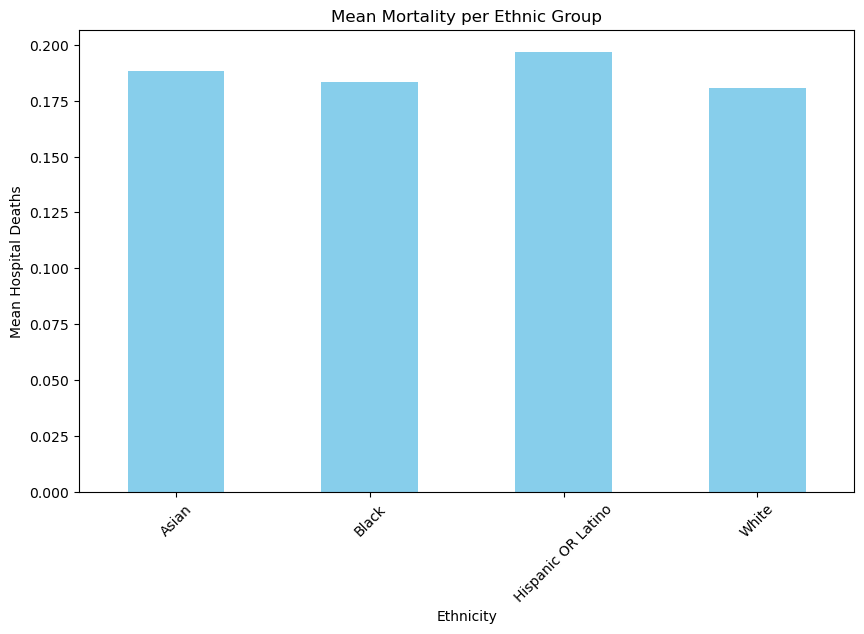

In [433]:
# let's plot the results! 

# Ensure matplotlib uses an inline backend
%matplotlib inline

# Create the bar plot with a specified figure size 
plt.figure (figsize =(10,6)) 

# Plot the mean mortality per ethnic group as a bar plot 
mortality_per_ethnicty.plot(kind = 'bar', color = 'skyblue') 

# Add labels and titles to the plot for a better understanding 
plt.xlabel('Ethnicity') # Label for the x-axis 
plt.ylabel('Mean Hospital Deaths') # Lable for the y-axis
plt.title('Mean Mortality per Ethnic Group') # Title of the plot

# Rotate the x-axis labels for better readability 
plt.xticks(rotation = 45) 

# Display the plot
plt.show() 

Why not comparing the sum of patients instead? 
- Normalizing the data by calculating the mean instead of the sum ensures that
we are comparing the mortality rates relative to the size of each ethnic group.
This is important because it allows us to see the proportional impact of mortality
across different groups, rather than choosing to plot the number of hospital deaths which is skewed by the total number of patients
in each group. This approach helps in identifying if certain groups have a disproportionately
higher or lower mortality rate, providing a clearer insight into potential biases or
disparities in the data.

## Initial Analysis of SpO2 and SaO2
* Present the statistical summary and visualize the distribution of SpO2 and SaO2 values.
* Highlight any differences in SpO2 and SaO2 distributions across different demographic groups (e.g., race_ethnicity, sex).

Goal: To explore the distribution of SpO2 and SaO2 values across different demographics. This step helps to identify any preliminary differences or patterns in SpO2 and SaO2 measurements among various groups.

In [434]:
# Statistical summary of SpO2 values 
Sp02_summary = df_final_clean['SpO2'].describe()
print("SpO2 summary:\n")
print(Sp02_summary.to_string())
print ("\n")

SaO2_summary = df_final_clean['SaO2'].describe()
print("SaO2 summary:\n")
print(SaO2_summary.to_string())

SpO2 summary:

count    40929.000000
mean        97.148525
std          3.830732
min         70.000000
25%         96.000000
50%         98.000000
75%        100.000000
max        100.000000


SaO2 summary:

count    40929.000000
mean        95.949845
std          4.154299
min         70.000000
25%         94.700000
50%         97.000000
75%         99.000000
max        100.000000


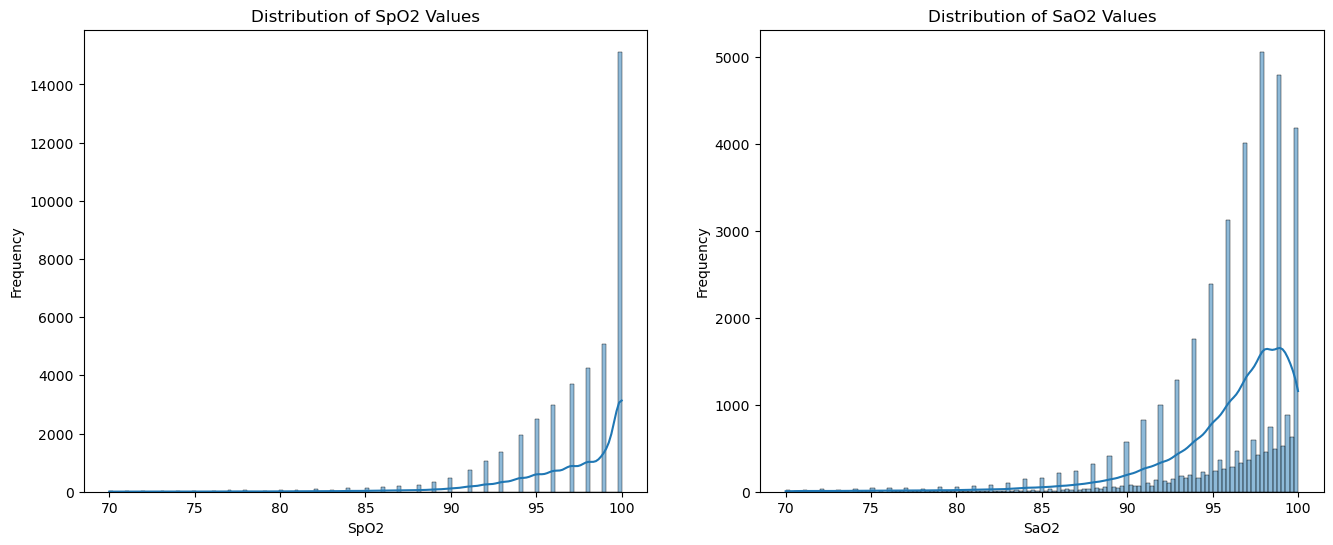

In [435]:
# Visualization of the Distribution of SpO2 values 
plt.figure(figsize=(16,6))


plt.subplot(1,2,1) # a 1-row, 2-column figure: go to the first subplot
sns.histplot(df_final_clean['SpO2'], kde = True)
plt.title ('Distribution of SpO2 Values')
plt.xlabel('SpO2')
plt.ylabel('Frequency')


# Visualization of the Distribution of SaO2 values 
plt.subplot(1,2,2)
sns.histplot(df_final_clean['SaO2'], kde = True)
plt.title ('Distribution of SaO2 Values')
plt.xlabel('SaO2')
plt.ylabel('Frequency')

# Adjust the space between the 2 subplots 
plt.subplots_adjust (wspace = 0.2)

plt.show()

Key Observations: 
* High Frequency of Near-Perfect SpO2 Readings: The distribution of SpO2 values shows a sharp increase in frequency at the higher end, particularly around 100. This indicates that pulse oximeters frequently report near-perfect oxygen saturation levels, suggesting potential issues with overestimation or insensitivity to lower oxygen saturation levels.
* Wider Distribution and Lower Peak for SaO2 Values: The SaO2 distribution is broader and does not show the same sharp peak at the higher end as the SpO2 distribution. This suggests that the more accurate arterial blood gas measurements capture a wider range of oxygen saturation levels and are less likely to overestimate saturation, highlighting the discrepancy between noninvasive and invasive measurements.

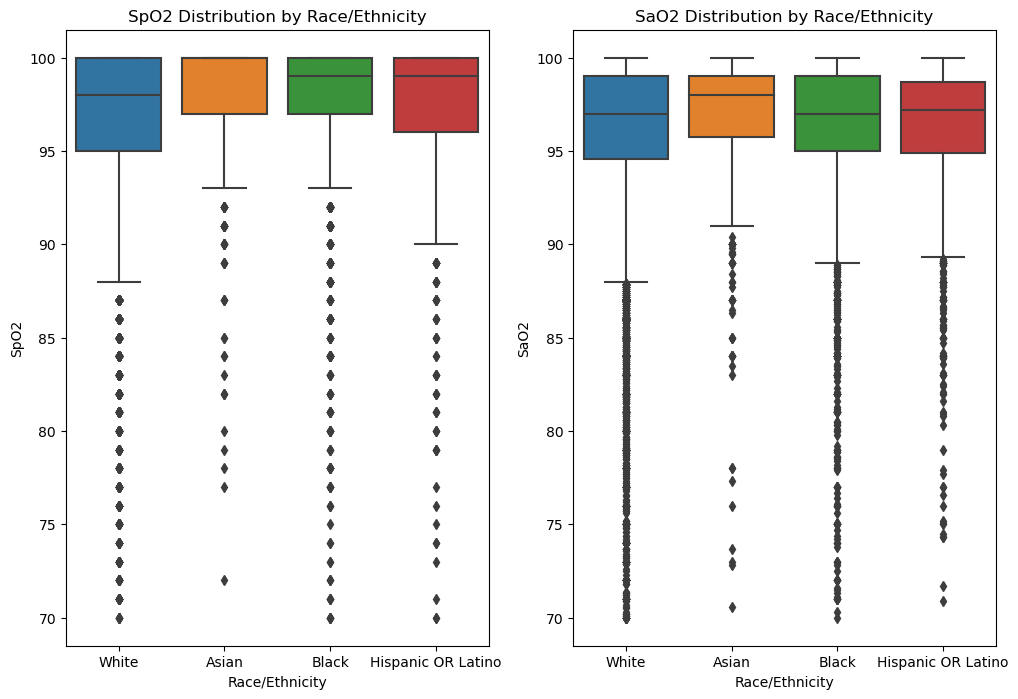

In [436]:
# Distribution of SpO2 values by race_ethnicity
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x='race_ethnicity', y='SpO2', data=df_final_clean)
plt.title('SpO2 Distribution by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('SpO2')


# Distribution of SaO2 values by race_ethnicity
plt.subplot(1,2,2)
sns.boxplot(x='race_ethnicity', y='SaO2', data=df_final_clean)
plt.title('SaO2 Distribution by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('SaO2')

# Adjust the space between the 2 subplots 
plt.subplots_adjust (wspace = 0.2)

plt.show()

Key Observations: 
* Consistent SpO2 Measurements Across Groups: The distribution of SpO2 values is relatively similar across all racial and ethnic groups (White, Asian, Black, Hispanic or Latino). Most readings cluster around higher saturation levels (near 100%), indicating a consistency in how pulse oximeters measure oxygen saturation across these groups.
* Greater Variability in SaO2 Measurements: The SaO2 values show greater variability across racial and ethnic groups, particularly in the lower ranges. There are more significant outliers and a wider spread in the lower SaO2 values, especially for the Black and Hispanic or Latino groups. This suggests that arterial oxygen saturation measurements capture a wider and potentially more accurate range of oxygen saturation levels compared to pulse oximetry.


## Analysis of Hypoxemia using SpO2 and SaO2 individually 

* Define hypoxemia using a threshold for SpO2 and SaO2.
* Compare the incidence of hypoxemia across different demographic groups.
* Highlight any disparities that may indicate bias in SpO2 measurements.

Goal: To compare SpO2 and SaO2 values side by side and examine the incidence of hypoxemia using both measurements. This step highlights the discrepancies and biases in SpO2 measurements by analyzing hypoxemia based on SaO2 measurements and compare it with SpO2-based analysis. This step emphasizes the importance of SaO2 measurements in revealing hidden hypoxemia that SpO2 alone might miss.

In [437]:
# Define Hypoxemia based on SpO2 threshold (e.g. SpO2 < 88%) and SpO2 threshold (e.g. SpO2 < 88%)
df_final_clean ['hypoxemia_SpO2'] = df_final_clean ['SpO2'] < 88 
df_final_clean ['hypoxemia_SaO2'] = df_final_clean ['SaO2'] < 88 

# Incidence of hypoxemia by race_ethnicity
hypoxemia_by_race_SpO2 = df_final_clean.groupby('race_ethnicity')['hypoxemia_SpO2'].mean().reset_index()
hypoxemia_by_race_SaO2 = df_final_clean.groupby('race_ethnicity')['hypoxemia_SaO2'].mean().reset_index()
    # The mean value represents the proportion of patients with hypoxemia in each racial/ethnic group.


hypoxemia_by_race_SpO2.columns = ['race_ethnicity', 'hypoxemia_incidence']
hypoxemia_by_race_SaO2.columns = ['race_ethnicity', 'hypoxemia_incidence']
hypoxemia_by_race_SpO2['hypoxemia_incidence'] *= 100 
hypoxemia_by_race_SaO2['hypoxemia_incidence'] *= 100 



print("SpO2:\n")
print (hypoxemia_by_race_SpO2)
print('\n')
print("SaO2:\n")
print (hypoxemia_by_race_SaO2)


SpO2:

       race_ethnicity  hypoxemia_incidence
0               Asian             2.119205
1               Black             2.869238
2  Hispanic OR Latino             2.193211
3               White             2.805305


SaO2:

       race_ethnicity  hypoxemia_incidence
0               Asian             3.708609
1               Black             5.620884
2  Hispanic OR Latino             3.916449
3               White             4.478490


/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_16914/2505968085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean ['hypoxemia_SpO2'] = df_final_clean ['SpO2'] < 88
/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_16914/2505968085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean ['hypoxemia_SaO2'] = df_final_clean ['SaO2'] < 88


### Hypoxemia Incidence

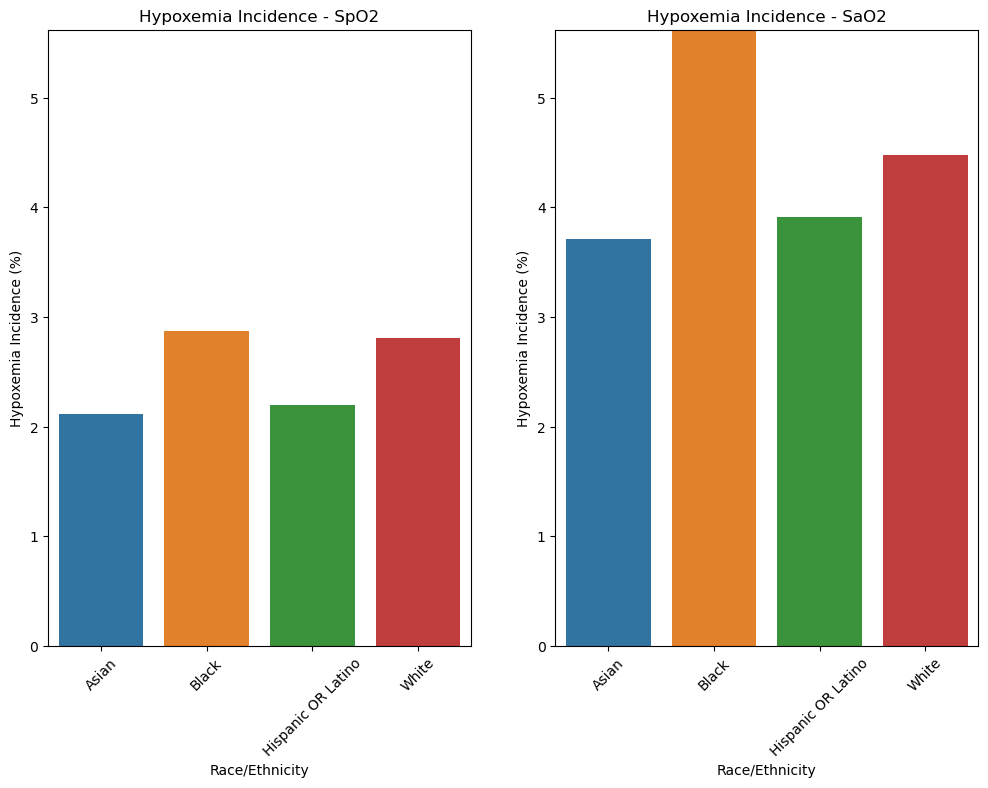

In [438]:
# Visualization 
plt.figure(figsize=(12,8))


# Define the common y-axis limit
y_max = max(hypoxemia_by_race_SpO2['hypoxemia_incidence'].max(), hypoxemia_by_race_SaO2['hypoxemia_incidence'].max())
# y_min = min(hypoxemia_by_race_SpO2['hypoxemia_incidence'].min(), hypoxemia_by_race_SaO2['hypoxemia_incidence'].min())

# a 1-row, 2-column figure: go to the first subplot 
plt.subplot(1,2,1)
sns.barplot(x='race_ethnicity', y='hypoxemia_incidence', data = hypoxemia_by_race_SpO2)
plt.title ('Hypoxemia Incidence - SpO2')
plt.xlabel('Race/Ethnicity')
plt.ylabel ('Hypoxemia Incidence (%)')
plt.xticks(rotation = 45)
plt.ylim(0,y_max)


# a 1-row, 2-column figure: go to the second subplot 
plt.subplot(1,2,2)
sns.barplot(x='race_ethnicity', y='hypoxemia_incidence', data = hypoxemia_by_race_SaO2)
plt.title ('Hypoxemia Incidence - SaO2')
plt.xlabel('Race/Ethnicity')
plt.ylabel ('Hypoxemia Incidence (%)')
plt.xticks(rotation = 45)
plt.ylim(0,y_max)

# Adjust the space between the 2 subplots 
plt.subplots_adjust (wspace = 0.2)

plt.show()

Key Observation:
* The disparity between the incidence of hypoxemia based on SpO2 and SaO2 measurements  indicates that relying only on SpO2 can lead to underestimation of hypoxemia, especially in certain racial-ethnic groups.
* The analysis reveals that SaO2 measurements uncover hidden hypoxemia cases not detected by SpO2 alone. 


## Hidden Hypoxemia
This brings us to the concept of hidden hypoxemia. Hidden hypoxemia occurs when patients exhibit low blood oxygen levels that are not detected by pulse oximetry. The accuracy issues and dataset imbalances can exacerbate this problem, particularly in non-white populations. In the next section, we will explore the prevalence of hidden hypoxemia across different racial and ethnic groups, highlighting the critical need for accurate and equitable diagnostic tools in clinical settings.


* Identify hidden hypoxemia using both SpO2 and SaO2 measurements.
* Compare the incidence of hidden hypoxemia across different demographic groups.
* Highlight how the bias in SpO2 measurements can lead to hidden hypoxemia, particularly in certain demographic groups.

Goal: To identify hidden hypoxemia (patients with normal SpO2 but low SaO2) and analyze its prevalence across different demographics. This step uncovers the hidden bias in SpO2 measurements and shows how certain groups are disproportionately affected.


### Hidden Hypoxemia - SpO2 & SaO2

In [439]:
# Identify hidden hypoxemia (SpO2 >= 88% and SaO2 < 88%)
df_final_clean['hidden_hypoxemia'] = df_final_clean.apply(lambda row: row['SpO2'] >= 88 and row['SaO2'] < 88, axis=1)

# Incidence of hidden hypoxemia by race_ethnicity
hidden_hypoxemia_by_race = df_final_clean.groupby('race_ethnicity')['hidden_hypoxemia'].mean().reset_index()
hidden_hypoxemia_by_race.columns = ['race_ethnicity', 'hidden_hypoxemia_incidence']
hidden_hypoxemia_by_race['hidden_hypoxemia_incidence'] *= 100

print(hidden_hypoxemia_by_race)

       race_ethnicity  hidden_hypoxemia_incidence
0               Asian                    2.516556
1               Black                    4.350894
2  Hispanic OR Latino                    3.028721
3               White                    3.358132


/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_16914/232903388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean['hidden_hypoxemia'] = df_final_clean.apply(lambda row: row['SpO2'] >= 88 and row['SaO2'] < 88, axis=1)


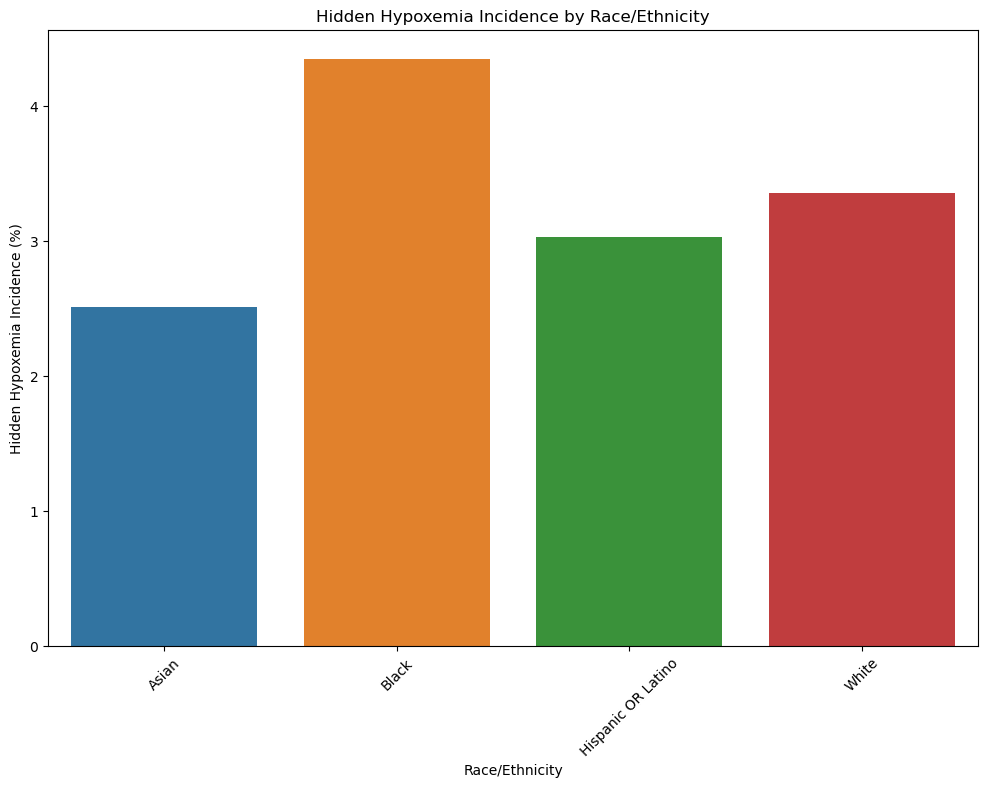

In [440]:
 # Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='race_ethnicity', y='hidden_hypoxemia_incidence', data=hidden_hypoxemia_by_race)
plt.title('Hidden Hypoxemia Incidence by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Hidden Hypoxemia Incidence (%)')
plt.xticks(rotation = 45)

plt.show()

Observation: The higher incidence of hidden hypoxemia in Black patients further supports the notion of bias in SpO2 measurements. Pulse oximeters may be less accurate for individuals with darker skin, resulting in normal SpO2 readings despite low SaO2 levels. This can lead to missed diagnoses and delayed treatment for hypoxemia.

### Conclusion: 

* Objective: To identify hidden hypoxemia by considering both SpO2 and SaO2 measurements and to compare its incidence across different racial/ethnic groups.
* Findings: The analysis of hidden hypoxemia shows even more pronounced disparities, with Black patients having the highest incidence.
* Implication: The high incidence of hidden hypoxemia in Black patients indicates that relying solely on SpO2 can miss cases of low blood oxygen levels, particularly in this group. This highlights the importance of considering SaO2 measurements to ensure accurate diagnosis and treatment.

The analysis highlights the importance of considering both SpO2 and SaO2 measurements in clinical settings, especially for patients from racial/ethnic groups that may be more susceptible to inaccuracies in SpO2 readings.

# Part 2: Modeling 

## SpO2 modifications - exaggerating the bias 
This first step is important in the tutorial as it simulates the impact of a known bias in medical devices, specifically pulse oximeters, which often overestimate blood oxygen levels in Black patients. By artificially increasing SpO2 values for Black patients by 10%, we create a dataset that exaggerates this bias. This allows us to analyze how such inaccuracies affect downstream clinical predictions, such as mortality, and highlights the need for fair and accurate data in healthcare machine learning models. 


In [441]:
# Display the baseline distribution of SpO2
print("Baseline SpO2 Distribution:")
print(df_final_clean['SpO2'].describe())

Baseline SpO2 Distribution:
count    40929.000000
mean        97.148525
std          3.830732
min         70.000000
25%         96.000000
50%         98.000000
75%        100.000000
max        100.000000
Name: SpO2, dtype: float64


In [442]:
# Add bias to Black patients' SpO2
delta_to_add = 10

df_final_clean['SpO2_exaggerated'] = df_final_clean.apply(
    lambda row: min(row['SpO2'] + delta_to_add, 100) if row['race_ethnicity'] == 'Black' else row['SpO2'],
    axis=1
)

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_16914/1544113247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_clean['SpO2_exaggerated'] = df_final_clean.apply(


In [443]:
# Compare both distributions for Black patients before and after modification
print("Before modification:")
print(df_final_clean.loc[df_final_clean['race_ethnicity'] == 'Black', 'SpO2'].describe())

print ("\n")
print("After modification:")
print(df_final_clean.loc[df_final_clean['race_ethnicity'] == 'Black', 'SpO2_exaggerated'].describe())


Before modification:
count    4252.000000
mean       97.709313
std         3.876860
min        70.000000
25%        97.000000
50%        99.000000
75%       100.000000
max       100.000000
Name: SpO2, dtype: float64


After modification:
count    4252.000000
mean       99.737300
std         1.668728
min        80.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: SpO2_exaggerated, dtype: float64


There is a 1% difference in the median which shows the impact of the introduced bias. 
N.B: The median is derived from the .describe() function, which provides various statistical summaries of the data, including the median (50% value).

In [444]:
df_final_clean.columns

Index(['source_db', 'comorbidity_score_value', 'unique_subject_id',
       'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id',
       'hospital_admission_id', 'icustay_id', 'hospitalid', 'admission_age',
       'sex_female', 'race_ethnicity', 'BMI_admission', 'datetime_icu_admit',
       'datetime_icu_discharge', 'los_ICU', 'los_hospital',
       'sofa_past_overall_24hr', 'sofa_future_overall_24hr',
       'vitals_heart_rate', 'vitals_mbp_i', 'vitals_mbp_ni', 'vitals_sbp_ni',
       'vitals_sbp_i', 'vitals_resp_rate', 'vitals_tempc', 'vitals_dbp_ni',
       'hfp_albumin', 'hfp_bilirubin_total', 'hfp_bilirubin_direct', 'bmp_bun',
       'bmp_lactate', 'bmp_creatinine', 'bmp_glucose', 'bmp_potassium',
       'bmp_sodium', 'cbc_hemoglobin', 'in_hospital_mortality', 'SpO2', 'SaO2',
       'sex', 'age_group', 'hypoxemia_SpO2', 'hypoxemia_SaO2',
       'hidden_hypoxemia', 'SpO2_exaggerated'],
      dtype='object')

## Train Test split 

In [445]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split (df_final_clean, test_size = 0.2, random_state = 42)

In [446]:
print("Shape of the training data", data_train.shape)
print("Shape of the testing data", data_test.shape)

Shape of the training data (32743, 46)
Shape of the testing data (8186, 46)


### Check balancing of the mortality outcome
The goal of checking the mean of hospital_death in the overall dataset, training set, and test set is to ensure that the distribution of the target variable (in-hospital mortality) is balanced across these subsets. This helps to verify that the data splitting process did not introduce any bias, ensuring the model will be trained and evaluated on representative samples.

In [447]:
print(df_final_clean.in_hospital_mortality.mean())
print(data_train.in_hospital_mortality.mean()) 
print(data_test.in_hospital_mortality.mean())

0.18194922915292336
0.18025226766026325
0.18873686782311264


They should not be too different as we need to ensure that the proportions of the target variable are similar across the overall dataset, training set, and test set helps in building a model that is more likely to generalize well and provides accurate performance metrics.

## Encoding 

Since the machine learning model in the background models and finds patterns in our data. It only supports numeric values. For this reason, categorical variables must be coded to numeric values.

Categorical variables can be of 3 types:
* Binary variables: Binary variables can be represented with two values, 1 and 0. Examples are whether or not the variable belongs to a group.
* Ordinal variables: Ordinal variables are a type of variables that have a specific order and can be represented with numeric variables through a label encoder. An example is High, Medium, and Low which can be represented as 3, 2, 1.
* Nominal variables: Nominal variables are categorical variables that do not have a defined order, for these variables it is not recommended to use a label encoder, it is better to use one hot encoder in these cases.

In [448]:
unique_values = df_final_clean.apply(lambda x: x.unique())
unique_values

source_db                                             [eicu, mimic_iii, mimic_iv]
comorbidity_score_value         [3.0, 9.0, 2.0, 4.0, 1.0, 8.0, 0.0, 5.0, 7.0, ...
unique_subject_id               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
unique_hospital_admission_id    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
unique_icustay_id               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
subject_id                      [002-10050, 002-1007, 002-10187, 002-10306, 00...
hospital_admission_id           [183274, 178462, 150828, 198249, 188445, 14610...
icustay_id                      [211144, 204935, 169525, 230427, 217835, 16341...
hospitalid                      [71, 73, 63, 68, 59, 79, 92, 102, 84, 90, 93, ...
admission_age                   [67.0, 83.0, 59.0, 73.0, 57.0, 63.0, 60.0, 43....
sex_female                                                                 [1, 0]
race_ethnicity                          [White, Asian, Black, Hispanic OR Latino]
BMI_admission   

## Normalization 
- Definition: Data normalization is an important step in machine learning because it helps to ensure that features are on similar scales, which can improve the performance of many machine learning algorithms.

- Why? 
    * When features are not on similar scales, some algorithms may be more heavily influenced by certain features than others, which can lead to suboptimal performance. Additionally, some algorithms (such as those based on distance calculations) can be sensitive to differences in scale between features, which can lead to incorrect results.
    * By normalizing the data, we can ensure that each feature contributes equally to the model, regardless of its scale. This can lead to better accuracy and more robust models.



Note: Use the function to normalize the data. Remember to exclude information that does not contribute to the final model, such as identifiers.

In [449]:
from sklearn.preprocessing import MinMaxScaler 

def normalize_data (train_data, test_data = None, scaler = None, ignore_cols = []): 
    # Drop columns that should not be normalized (e.g., identifiers)
    train_data_filtered = train_data.drop (ignore_cols, axis = 1) 
    if test_data is not None: 
        test_data_filtered = test_data.drop(ignore_cols, axis = 1) 

    # If no scaler is provided, initialize a MinMaxScaler
    if not scaler: 
            scaler = MinMaxScaler() # MinMaxScaler scales each feature to a range [0, 1]
            scaler.fit(train_data_filtered) # Fit the scaler on the training data to compute min and max values
        
    # Transform the training data using the scaler
    normalized_train = scaler.transform(train_data_filtered) 
    # Convert the normalized data back to a DataFrame with the same columns as train_data_filtered
    normalized_train_df = pd.DataFrame (normalized_train, columns = train_data_filtered.columns) 

     # If test data is provided, transform it using the same scaler
    if test_data is not None: 
        # Normalized the test data 
        normalized_test = scaler.transform(test_data_filtered) 
        normalized_test_df = pd.DataFrame(normalized_test, columns = test_data_filtered.columns) 
        
        # Return the normalized training and test data along with the scaler
        return normalized_train_df, normalized_test_df, scaler 
    else: 
        # If no test data is provided, return only the normalized training data and the scaler
        return normalized_train_df, scaler 

Note: Why Return the Scaler? Returning the scaler allows you to use the same scaler for any future data transformations, ensuring consistency. This is especially important if you need to apply the same scaling to new data or to reverse the scaling transformation.

How to know what columns to include? You should exclude identifiers and categorical variables that are not intended to be scaled

In [450]:
# Define the columns to ignore during normalization (identifiers and categorical variables)
ignore_cols = [
    'unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 
    'subject_id', 'hospital_admission_id', 'icustay_id', 'hospitalid', 
    'source_db', 'sex_female', 'race_ethnicity', 'in_hospital_mortality', 'datetime_icu_discharge', 'datetime_icu_admit','sex', 
    'age_group', 'hypoxemia_SpO2', 'hypoxemia_SaO2' , 'hidden_hypoxemia'     
]

In [451]:
# Call the normalize_data function our data 
normalized_train, normalized_test, scaler = normalize_data (data_train, data_test, ignore_cols = ignore_cols)

In [452]:
normalized_train.columns

Index(['comorbidity_score_value', 'admission_age', 'BMI_admission', 'los_ICU',
       'los_hospital', 'sofa_past_overall_24hr', 'sofa_future_overall_24hr',
       'vitals_heart_rate', 'vitals_mbp_i', 'vitals_mbp_ni', 'vitals_sbp_ni',
       'vitals_sbp_i', 'vitals_resp_rate', 'vitals_tempc', 'vitals_dbp_ni',
       'hfp_albumin', 'hfp_bilirubin_total', 'hfp_bilirubin_direct', 'bmp_bun',
       'bmp_lactate', 'bmp_creatinine', 'bmp_glucose', 'bmp_potassium',
       'bmp_sodium', 'cbc_hemoglobin', 'SpO2', 'SaO2', 'SpO2_exaggerated'],
      dtype='object')

In [453]:
import matplotlib.pyplot as plt

def plot_distributions(data, title):
    plt.figure(figsize=(20, 15))
    data.hist(bins=30, figsize=(20, 15), layout=(8, 6))
    plt.suptitle(title, fontsize=20)
    plt.show()

# # Plot distributions for normalized train data
# plot_distributions(normalized_train, "Distribution of Variables in Normalized Train Data")

# # Plot distributions for normalized test data
# plot_distributions(normalized_test, "Distribution of Variables in Normalized Test Data")

In [454]:
# Selecting Ignored Columns
ignored_columns_train = data_train[ignore_cols]
ignored_columns_test = data_test[ignore_cols]

In [455]:
# Merge the ignored columns with the normalized columns
final_normalized_train = pd.concat([normalized_train, ignored_columns_train.reset_index(drop=True)], axis=1)
final_normalized_test = pd.concat([normalized_test, ignored_columns_test.reset_index(drop=True)], axis=1)

In [456]:
final_normalized_test.columns
final_normalized_train.columns

Index(['comorbidity_score_value', 'admission_age', 'BMI_admission', 'los_ICU',
       'los_hospital', 'sofa_past_overall_24hr', 'sofa_future_overall_24hr',
       'vitals_heart_rate', 'vitals_mbp_i', 'vitals_mbp_ni', 'vitals_sbp_ni',
       'vitals_sbp_i', 'vitals_resp_rate', 'vitals_tempc', 'vitals_dbp_ni',
       'hfp_albumin', 'hfp_bilirubin_total', 'hfp_bilirubin_direct', 'bmp_bun',
       'bmp_lactate', 'bmp_creatinine', 'bmp_glucose', 'bmp_potassium',
       'bmp_sodium', 'cbc_hemoglobin', 'SpO2', 'SaO2', 'SpO2_exaggerated',
       'unique_subject_id', 'unique_hospital_admission_id',
       'unique_icustay_id', 'subject_id', 'hospital_admission_id',
       'icustay_id', 'hospitalid', 'source_db', 'sex_female', 'race_ethnicity',
       'in_hospital_mortality', 'datetime_icu_discharge', 'datetime_icu_admit',
       'sex', 'age_group', 'hypoxemia_SpO2', 'hypoxemia_SaO2',
       'hidden_hypoxemia'],
      dtype='object')

## Defining our X_train, y_train, X_test, y_test


In [457]:

# X_train = final_normalized_train[['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'SpO2_exaggerated',
#                              'hfp_albumin', 'bmp_glucose', 'vitals_heart_rate', 'vitals_tempc','SpO2','SaO2','hidden_hypoxemia']]
X_train = final_normalized_train[['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'hidden_hypoxemia', 'SpO2', 'SaO2','SpO2_exaggerated']]

In [458]:
# X_test = final_normalized_train[['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'SpO2_exaggerated',
#                              'hfp_albumin', 'bmp_glucose', 'vitals_heart_rate', 'vitals_tempc','SpO2','SaO2','hidden_hypoxemia']]

X_test = final_normalized_test[['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'hidden_hypoxemia', 'SpO2', 'SaO2','SpO2_exaggerated']]

In [459]:
y_train = final_normalized_train['in_hospital_mortality']
y_test = final_normalized_test['in_hospital_mortality']

## Step 1: Understanding the influence of hidden hypoxemia on patient outcomes 
* Following the paper's approach, we are going to perform multivariate logistic regression to assess binary endpoints (e.g., in-hospital mortality) while adjusting for other covariates (e.g., age, sex, SOFA score), and to use analysis of variance to test for the impact of hidden hypoxemia. 

* Goal: Assess the impact of hidden hypoxemia by analyzing its effect on patient outcomes like in-hospital mortality. 

In [470]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define the features to include, excluding 'SpO2_exaggerated'
features_to_include = [col for col in X_train.columns if col != 'SpO2_exaggerated']


# Fit the logistic regression model 
model = LogisticRegression (max_iter = 1000) 
model.fit(X_train[features_to_include], y_train) 

# Predictions 
y_pred = model.predict(X_test[features_to_include]) 
y_pred_proba = model.predict_proba(X_test[features_to_include]) [:,1]


# Evaluate the model 
print("Classification Report:")
print (classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Area under the Curve (AUC) 
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      6641
         1.0       0.64      0.04      0.07      1545

    accuracy                           0.81      8186
   macro avg       0.73      0.52      0.48      8186
weighted avg       0.78      0.81      0.74      8186

Accuracy: 0.81
AUC: 0.66


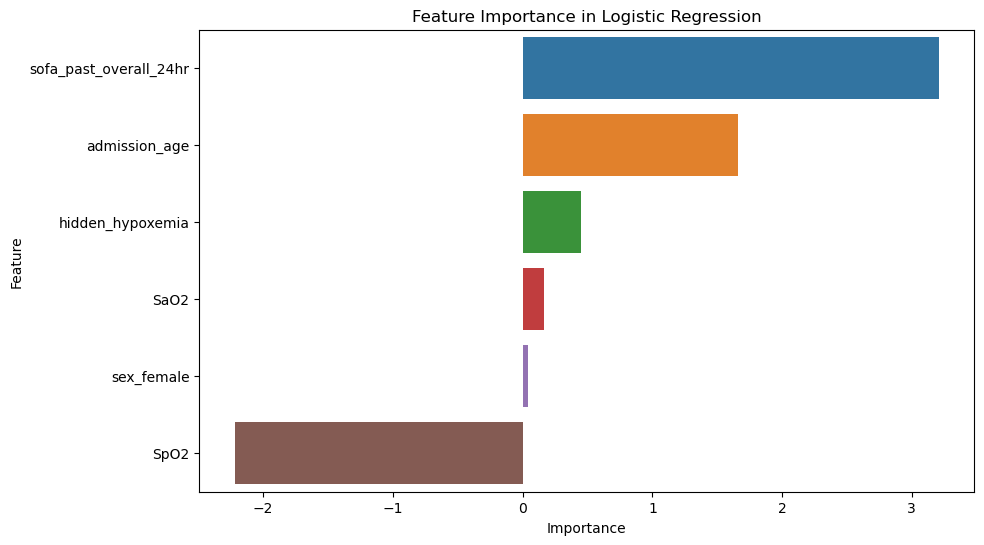

In [471]:
# Extract coefficients and their importance
coefficients = model.coef_[0]
importance = pd.DataFrame({'Feature': X_train[features_to_include].columns, 'Importance': coefficients})
importance = importance.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance in Logistic Regression')
plt.show()

The feature importance plot for the logistic regression model indicates that "sofa_past_overall_24hr" is the most influential feature for predicting in-hospital mortality, followed by "admission_age" and "hidden_hypoxemia". This suggests that these factors have a significant impact on the model's predictions. Notably, "SpO2" has a negative importance value, indicating it may negatively contribute to the prediction of in-hospital mortality in the presence of other covariates. "SaO2" has less impact than "hidden_hypoxemia", reinforcing the importance of including variables that accurately reflect the patient's oxygenation status and considering potential biases in the data.

## Step 2: Predicting In Hospital Mortality using different features in the dataset 
Goal: Compare the performance of different models that include various combinations of features (SpO2, Sp02_exaggerated, SaO2, hidden hypoxemia) in predicting in-hospital mortality across different patient races. This step demonstrates how including or excluding certain features impacts model accuracy, fairness, and overall predictive performance, emphasizing the need for careful feature selection in clinical predictions.

In [472]:
from sklearn.metrics import roc_auc_score

# Helper function to train and evaluate models
def train_model (X_train, X_test, y_train, features):
    # Create an instance of Logistic Regression model with a maximum of 1000 iterations for convergence
    model = LogisticRegression(max_iter=1000)
    
    # Fit the model on the training data using the specified features
    model.fit(X_train[features], y_train)
    
    # Predict the target values for the test data
    y_pred = model.predict(X_test[features])
    
    # Predict the probabilities of the positive class for the test data
    y_pred_proba = model.predict_proba(X_test[features])[:, 1]
    
    # Return the trained model, predictions, predicted probabilities
    return model, y_pred, y_pred_proba


In [473]:
# Define feature sets for each model
features_sao2 = ['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'SaO2']
features_spo2 = ['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'SpO2']
features_all = ['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'hidden_hypoxemia', 'SpO2', 'SaO2']
features_exaggerated_spo2 = ['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'SpO2_exaggerated']


# features_sao2 = ['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'SaO2',
#                  'hfp_albumin', 'bmp_glucose', 'vitals_heart_rate', 'vitals_temp']
# features_spo2 = ['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'SpO2',
#                  'hfp_albumin', 'bmp_glucose', 'vitals_heart_rate', 'vitals_tempc']
# features_all = ['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'hidden_hypoxemia', 'SpO2', 'SaO2',
#                 'hfp_albumin', 'bmp_glucose', 'vitals_heart_rate', 'vitals_tempc']
# features_exaggerated_spo2 = ['admission_age', 'sex_female', 'sofa_past_overall_24hr', 'SpO2_exaggerated',
#                              'hfp_albumin', 'bmp_glucose', 'vitals_heart_rate', 'vitals_temp']


# Train each model 
model_sao2, y_pred_sao2, y_pred_proba_sao2 = train_model(X_train, X_test, y_train, features_sao2)
model_spo2, y_pred_spo2, y_pred_proba_spo2 = train_model(X_train, X_test, y_train, features_spo2)
model_all, y_pred_all, y_pred_proba_all = train_model(X_train, X_test, y_train, features_all)
model_exaggerated_spo2, y_pred_exaggerated_spo2, y_pred_proba_exaggerated_spo2 = train_model(X_train, X_test, y_train,features_exaggerated_spo2)

In [474]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Evaluate across races
def evaluate_across_races(X_test, y_test, y_pred, y_pred_proba, data_test, model, features):
    """
    Evaluate model performance across different race/ethnicity groups.
    
    This function evaluates the performance of a trained machine learning model across
    different race/ethnicity groups in the test dataset. It generates classification reports,
    calculates accuracy and AUC scores, and identifies feature importance for each group.
    
    Parameters:
    X_test (array-like): Test features.
    y_test (array-like): True labels for the test set.
    y_pred (array-like): Predicted labels for the test set.
    y_pred_proba (array-like): Predicted probabilities for the positive class.
    data_test (DataFrame): Test dataset containing the race/ethnicity information.
    model (sklearn model): Trained machine learning model.
    features (list): List of feature names.
    
    Returns:
    group_reports (dict): Dictionary containing classification reports, accuracy, and AUC scores for each race/ethnicity group.
    feature_importance_dict (dict): Dictionary containing feature importance for each race/ethnicity group.
    """
    
    # Create a DataFrame for evaluation using the test features
    evaluation_df = pd.DataFrame(X_test, columns=features)
    
    # Add the actual test labels to the DataFrame
    evaluation_df['y_test'] = y_test.values
    
    # Add the predicted labels to the DataFrame
    evaluation_df['y_pred'] = y_pred
    
    # Add the predicted probabilities to the DataFrame
    evaluation_df['y_pred_proba'] = y_pred_proba
    
    # Add the race/ethnicity information to the DataFrame
    evaluation_df['race_ethnicity'] = data_test['race_ethnicity'].values

    # Initialize dictionaries to store reports and feature importances for each race group
    group_reports = {}
    feature_importance_dict = {}

    # Loop through each unique race/ethnicity group in the evaluation DataFrame
    for group in evaluation_df['race_ethnicity'].unique():
        # Filter the data for the current race/ethnicity group
        group_data = evaluation_df[evaluation_df['race_ethnicity'] == group]
        
        # Extract the actual labels for the current group
        y_test_group = group_data['y_test']
        
        # Extract the predicted labels for the current group
        y_pred_group = group_data['y_pred']
        
        # Extract the predicted probabilities for the current group
        y_pred_proba_group = group_data['y_pred_proba']

        # Generate a classification report for the current group
        report = classification_report(y_test_group, y_pred_group, output_dict=True)
        
        # Calculate the accuracy for the current group
        accuracy = accuracy_score(y_test_group, y_pred_group)
        
        # Calculate the AUC score for the current group
        auc = roc_auc_score(y_test_group, y_pred_proba_group)
        
        # Add accuracy and AUC score to the report
        report['accuracy'] = accuracy
        report['auc'] = auc
        
        # Calculate feature importance for the current group
        feature_importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.coef_[0][:len(features)]
        }).sort_values(by='Importance', ascending=False)
        
        # Store the report and feature importance for the current group
        group_reports[group] = report
        feature_importance_dict[group] = feature_importance

    # Return the dictionaries containing the reports and feature importances for all groups
    return group_reports, feature_importance_dict


In [475]:
# Evaluate across races for each model
group_reports_sao2, importance_sao2_race = evaluate_across_races(X_test, y_test, y_pred_sao2, y_pred_proba_sao2, data_test, model_sao2, features_sao2)
group_reports_spo2, importance_spo2_race = evaluate_across_races(X_test, y_test, y_pred_spo2, y_pred_proba_spo2, data_test, model_spo2, features_spo2)
group_reports_exaggerated_spo2, importance_exaggerated_spo2_race = evaluate_across_races(X_test, y_test, y_pred_exaggerated_spo2, y_pred_proba_exaggerated_spo2, data_test, model_exaggerated_spo2, features_exaggerated_spo2)
group_reports_all, importance_all_race = evaluate_across_races(X_test, y_test, y_pred_all, y_pred_proba_all, data_test, model_all, features_all)


In [476]:
# Function to extract and format results for display
def format_group_reports(group_reports, model_name):
    """
    This function takes the classification reports for different race groups and formats them into a list of dictionaries
    for easier display and analysis.

    Parameters:
    - group_reports: A dictionary where the keys are race groups and the values are classification reports.
    - model_name: The name of the model being evaluated, used to label the results.

    Returns:
    - data: A list of dictionaries, where each dictionary contains the performance metrics for a specific race group.
    """
    
    # Initialize an empty list to store the formatted results
    data = []
    
    # Iterate over each race group and its corresponding report in the group_reports dictionary
    for race, report in group_reports.items():
        
        # Append a dictionary to the data list with the performance metrics for the current race group
        data.append({
            "Race": race,  # The race group
            "Model": model_name,  # The name of the model
            "Weighted Precision": report['weighted avg']['precision'],  # Weighted precision for the race group
            "Weighted Recall": report['weighted avg']['recall'],  # Weighted recall for the race group
            "Weighted F1-Score": report['weighted avg']['f1-score'],  # Weighted F1-score for the race group
            "Accuracy": report['accuracy'],  # Accuracy for the race group
            "AUC": report['auc']  # Area Under the ROC Curve (AUC) for the race group
        })
    
    # Return the formatted data list
    return data


In [477]:
# Collect results for all models
results_sao2 = format_group_reports(group_reports_sao2, "SaO2")
results_spo2 = format_group_reports(group_reports_spo2, "SpO2")
results_exaggerated_spo2 = format_group_reports(group_reports_exaggerated_spo2, "Exaggerated SpO2")
results_all = format_group_reports(group_reports_all, "All Features")

all_results = results_sao2 + results_spo2+ results_exaggerated_spo2 + results_all

# Convert the combined list of results into a DataFrame for better visualization and analysis
results_df = pd.DataFrame(all_results)

# Display the results with styling
# Set the caption for the DataFrame and apply a background gradient for better readability
results_df_styled = results_df.style.set_caption("Model Performance Across Races").background_gradient()

# Display the styled DataFrame
display(results_df_styled)

,Race,Model,Weighted Precision,Weighted Recall,Weighted F1-Score,Accuracy,AUC
0,White,SaO2,0.779300,0.813827,0.735745,0.813827,0.637998
1,Black,SaO2,0.847509,0.812195,0.729241,0.812195,0.674121
2,Hispanic OR Latino,SaO2,0.776618,0.802993,0.722159,0.802993,0.654167
3,Asian,SaO2,0.622659,0.782609,0.693531,0.782609,0.627966
4,White,SpO2,0.796619,0.816464,0.742994,0.816464,0.651786
5,Black,SpO2,0.779305,0.813415,0.738565,0.813415,0.680044
6,Hispanic OR Latino,SpO2,0.821152,0.812968,0.744048,0.812968,0.682516
7,Asian,SpO2,0.732310,0.789855,0.709920,0.789855,0.652642
8,White,Exaggerated SpO2,0.795828,0.816171,0.742092,0.816171,0.651549
9,Black,Exaggerated SpO2,0.657494,0.809756,0.725725,0.809756,0.674756


Reminder: 
- Recall: This is critical in your context because it measures the ability of the model to identify all actual positive cases (e.g., patients who died). High recall ensures that the model doesn't miss many critical cases, which is essential in a healthcare setting.

- Precision: While not as critical as recall, precision indicates the proportion of positive identifications that are actually correct. It helps in understanding the false positive rate.

- F1-Score: This metric provides a balance between precision and recall. It's useful when you want a single metric that considers both false positives and false negatives.

- Accuracy: While it gives an overall performance measure, it can be misleading in imbalanced datasets (e.g., more patients survive than die).

- AUC (Area Under the Curve): This metric helps understand the model's ability to distinguish between positive and negative cases across various threshold settings. It’s useful for evaluating overall model performance.



Observations on Model Performance Across Races:

- SaO2 Model:
    - Black patients have higher precision and recall compared to other races, suggesting better identification of true positives and fewer false negatives.
    - Asian patients show lower performance metrics, indicating potential disparities in prediction accuracy.

- SpO2 Model:
    - Performance metrics are fairly consistent across races, but Black patients still show slightly higher precision and recall.
    - Asian patients again have slightly lower performance metrics compared to other races.

- All Features Model:
    - Including all features, including hidden hypoxemia, improves performance metrics across all races, especially in accuracy and AUC.
    - Hispanic or Latino and Black patients benefit the most from the inclusion of all features, showing the highest weighted F1-scores and AUC.

- Impact of Hidden Hypoxemia:
    - The inclusion of hidden hypoxemia appears to enhance the model's ability to predict in-hospital mortality across all racial groups, but particularly for Black and Hispanic or Latino patients.
    - This suggests that accounting for hidden biases like hypoxemia is crucial for creating more accurate and equitable predictive models in healthcare.
 
- Exaggerated SpO2:
    - For White patients, the exaggerated SpO2 model performs similarly to the model with SpO2.
    - Black patients show a marked decrease in weighted precision, indicating the adverse impact of exaggerated SpO2 on prediction accuracy.
    - Hispanic or Latino and Asian patients' metrics are relatively stable, suggesting the impact of exaggerated SpO2 may be more pronounced for Black patients.


* General Observations:
    - Models using SaO2 only tend to have higher precision and recall for Black patients compared to others, potentially reflecting disparities in care or measurement accuracy.
    - SpO2 alone performs well but slightly less effectively than models using all features, highlighting the importance of a comprehensive approach that includes multiple indicators and adjustments for biases.
    - The inclusion of hidden hypoxemia and both SpO2 and SaO2 provides the most robust model for predicting in-hospital mortality, particularly benefiting Black patients who may be adversely affected by biases in SpO2 measurements.



In [468]:
# import pandas as pd

# # Helper function to combine feature importance for each race
# def combine_feature_importance(importance_dict, race):
#     df = pd.DataFrame()
#     for model_name, importance in importance_dict.items():
#         model_df = importance.loc[:, ['Feature', 'Importance']].copy()
#         model_df.columns = ['Feature', f'{model_name} Importance']
#         if df.empty:
#             df = model_df
#         else:
#             df = df.merge(model_df, on='Feature', how='outer')
#     df['Race'] = race
#     return df

# # Function to create a summary DataFrame for feature importance
# def create_feature_importance_summary(importance_sao2_race, importance_spo2_race, importance_all_race, importance_exaggerated_spo2_race):
#     races = importance_sao2_race.keys()
#     summary_dict = {}
#     for race in races:
#         importance_dict = {
#             'SaO2': importance_sao2_race[race],
#             'SpO2': importance_spo2_race[race],
#             'All Features': importance_all_race[race],
#             'Exaggerated SpO2': importance_exaggerated_spo2_race[race]
#         }
#         summary_dict[race] = combine_feature_importance(importance_dict, race)
#     return summary_dict


In [469]:
# # Create the summary DataFrame
# feature_importance_summary = create_feature_importance_summary(
#     importance_sao2_race,
#     importance_spo2_race,
#     importance_all_race,
#     importance_exaggerated_spo2_race
# )

# # # Display the summary for each race
# # for race, df in feature_importance_summary.items():
# #     print(f"Feature Importance Summary for Race: {race}")
# #     display(df)

# # Styling the DataFrame for better readability
# def style_feature_importance_summary(summary_dict):
#     styled_summary = {}
#     for race, df in summary_dict.items():
#         styled_summary[race] = df.style.set_caption(f"Feature Importance Summary for Race: {race}").background_gradient()
#     return styled_summary

# styled_feature_importance_summary = style_feature_importance_summary(feature_importance_summary)

# # Display styled summaries
# for race, styled_df in styled_feature_importance_summary.items():
#     display(styled_df)


Observations: 
* Hidden Hypoxemia: This feature appears significant for almost all models and across all racial groups, reinforcing its critical role in accurate mortality prediction. It highlights the disparity between SpO2 and SaO2 values, particularly for individuals with darker skin tones, and its contribution to the overall model performance.

* SpO2: This feature shows varying importance, with it being significant in models explicitly including it but notably negative in its influence when compared to SaO2 and hidden hypoxemia, particularly for Black patients, illustrating potential biases in non-invasive measurements.

* SaO2: Generally important but less so than SOFA scores and hidden hypoxemia. It has a significant positive impact when included in models.

* Exaggerated SpO2: This feature demonstrates negative importance in most cases, indicating that artificially increasing SpO2 values for Black patients leads to a decrease in model performance, underlining the detrimental effect of biased measurements.



# Conclusion: 
The tutorial demonstrates the critical importance of understanding the origins and potential biases of the variables used in clinical measurements. By revealing the limitations of relying solely on SpO2, it highlights how combining SpO2 with SaO2 provides a more accurate and equitable assessment of patients' oxygen levels. 